# Sentiment Analysis

In [21]:
import pandas as pd
import matplotlib. pyplot as plt
#import clean_tweets_dataframe
import numpy as np
import seaborn as sns
import warnings

df = pd.read_csv('../data/processed_tweet_datax.csv', encoding='latin-1')

df.head()

,statuses_count,created_at,source,original_text,polarity,subjectivity,favorite_count,retweet_count,screen_name,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location,language
0,281,Fri Apr 22 22:17:05 +0000 2022,Twitter for Android,RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,188,43,davideiacovozzi,18,55,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN,en
1,281,Fri Apr 22 13:44:53 +0000 2022,Twitter for Android,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,179,32,davideiacovozzi,18,55,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN,en
2,281,Fri Apr 22 06:10:34 +0000 2022,Twitter for Android,RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,193,26,davideiacovozzi,18,55,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter Ã¢...",NaN,en
3,281,Thu Apr 21 17:22:09 +0000 2022,Twitter for Android,RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,620,213,davideiacovozzi,18,55,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN,en
4,281,Thu Apr 21 10:32:26 +0000 2022,Twitter for Android,RT @biancoresearch: Rates rise until something...,-0.40,0.400000,1787,417,davideiacovozzi,18,55,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN,en


In [9]:
cleantweet = df[["original_text", "polarity"]]
cleantweet

,original_text,polarity
0,RT @NorthstarCharts: The 10-year yield is tell...,0.16
1,RT @MichaelAArouet: German 10y mortgage rate w...,0.15
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00
3,RT @charliebilello: The 30-year mortgage rate ...,0.00
4,RT @biancoresearch: Rates rise until something...,-0.40
...,...,...
16467,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,0.50
16468,RT @pbhushan1: Thank you @BajpayeeManoj for th...,0.85
16469,RT @s_shreyatweets: Agree ?Ã°ÂÂÂ https://t....,0.00
16470,RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...,-0.30


In [10]:
def pol_test(p):
    """
    converts polarity into sentiment category
    """
    if p > 0:
        return "positive"
    elif p < 0:
        return "negative"
    else:
        return "neutral"

In [12]:
cleantweet["score"] = cleantweet["polarity"].apply(pol_test)
cleantweet


/tmp/ipykernel_21003/187294414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleantweet["score"] = cleantweet["polarity"].apply(pol_test)


,original_text,polarity,score
0,RT @NorthstarCharts: The 10-year yield is tell...,0.16,positive
1,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,positive
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,neutral
3,RT @charliebilello: The 30-year mortgage rate ...,0.00,neutral
4,RT @biancoresearch: Rates rise until something...,-0.40,negative
...,...,...,...
16467,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,0.50,positive
16468,RT @pbhushan1: Thank you @BajpayeeManoj for th...,0.85,positive
16469,RT @s_shreyatweets: Agree ?Ã°ÂÂÂ https://t....,0.00,neutral
16470,RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...,-0.30,negative


In [13]:

sentiment = cleantweet['score'].value_counts()
sentiment

neutral     7466
positive    6315
negative    2691
Name: score, dtype: int64

In [23]:
cleanTweet = cleantweet[cleantweet['score'] != 'neutral']
cleanTweet

,original_text,polarity,score
0,RT @NorthstarCharts: The 10-year yield is tell...,0.16,positive
1,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,positive
4,RT @biancoresearch: Rates rise until something...,-0.40,negative
5,RT @LanceRoberts: Buying opportunities like th...,-0.10,negative
6,RT @MacroAlf: Welcome to September 2018.\n\nBo...,0.40,positive
...,...,...,...
16465,"RT @ozamizcps: PSSg Gedson CastaÃÂ±eros, Mobi...",0.10,positive
16466,RT @Salt_Project_OS: Free yourself from writin...,0.40,positive
16467,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,0.50,positive
16468,RT @pbhushan1: Thank you @BajpayeeManoj for th...,0.85,positive


In [24]:
# add scoremap column
def scoremap(score):
    """
    maps sentiment score to 0 and 1
    """
    if score == "positive":
        return 1
    else:
        return 0

In [25]:
cleanTweet['scoremap'] = cleanTweet["score"].map(scoremap)
cleanTweet

/tmp/ipykernel_21003/2897186944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanTweet['scoremap'] = cleanTweet["score"].map(scoremap)


,original_text,polarity,score,scoremap
0,RT @NorthstarCharts: The 10-year yield is tell...,0.16,positive,1
1,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,positive,1
4,RT @biancoresearch: Rates rise until something...,-0.40,negative,0
5,RT @LanceRoberts: Buying opportunities like th...,-0.10,negative,0
6,RT @MacroAlf: Welcome to September 2018.\n\nBo...,0.40,positive,1
...,...,...,...,...
16465,"RT @ozamizcps: PSSg Gedson CastaÃÂ±eros, Mobi...",0.10,positive,1
16466,RT @Salt_Project_OS: Free yourself from writin...,0.40,positive,1
16467,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,0.50,positive,1
16468,RT @pbhushan1: Thank you @BajpayeeManoj for th...,0.85,positive,1


/home/ammon/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='count'>

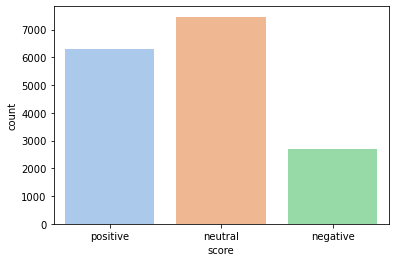

In [30]:
sns.countplot(cleantweet['score'], palette="pastel")